In [1]:
import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"


In [2]:
print(os.environ["LD_LIBRARY_PATH"])

/usr/local/cuda-11.5/lib64


In [3]:

import zipfile
import random
import tensorflow as tf
import keras 
from keras.optimizer_v2 import (
    adadelta,
    adagrad,
    adamax,
    adam,
    learning_rate_schedule,
    gradient_descent,
    ftrl,
    )
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.regularizers import l2, l1_l2
from keras.constraints import MaxNorm
from keras.callbacks import Callback, EarlyStopping, LearningRateScheduler

import random
import sys 

print(tf.__version__)
print(sys.version)

2.8.0
3.10.4 (main, Mar 25 2022, 00:00:00) [GCC 11.2.1 20220127 (Red Hat 11.2.1-9)]


In [4]:
from keras.models import Model

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import inspect 
import time 
import datetime
import cv2

# use seaborn plotting defaults
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.image as mpimg
from PIL import Image
from PIL import ImageFilter

In [6]:
import pandas as pd 

In [7]:
DATA_PATH = './OCT2017/all_data'

In [8]:
data_listing = os.listdir(DATA_PATH)

In [9]:
print(data_listing)

['NORMAL', 'CNV', 'DME', 'DRUSEN']


In [10]:
train_dir= DATA_PATH
CNV_PATH = os.path.join(train_dir, 'CNV')
DME_PATH = os.path.join(train_dir, 'DME')
NORMAL_PATH = os.path.join(train_dir, 'NORMAL')
DRUSEN_PATH = os.path.join(train_dir, 'DRUSEN')

In [11]:
cnv = os.listdir(CNV_PATH)
dme = os.listdir(DME_PATH)
normal = os.listdir(NORMAL_PATH)
drusen = os.listdir(DRUSEN_PATH)

In [12]:
print(len(cnv))
print(len(dme))
print(len(normal))
print(len(drusen))

37205
11348
26315
8616


In [13]:
def plot_grid(path_prefix, images_list, ncols=4, nrows=4, grey=False):
    import os
    example_test_images = random.sample(images_list, ncols*nrows)
    fig = plt.gcf()
    fig.set_size_inches(15, 15)

    for i, img_path in enumerate(example_test_images):
                   
        sp = plt.subplot(nrows, ncols, i+1)
        sp.axis('Off')
        img = mpimg.imread(os.path.join(path_prefix, img_path))
        if grey:
            plt.imshow(img, cmap=plt.get_cmap('gray'))
        else:
            plt.imshow(img)
    plt.show()

In [18]:
def train_nn_model(optimizer):


    # regu = tf.keras.regularizers.l2(1e-4)
    regu = tf.keras.regularizers.l1_l2(5e-8, 5e-8)
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(256, 256, 3)),
        tf.keras.layers.Conv2D(32, (3,3), strides=1, padding='same', activation='leaky_relu', kernel_regularizer=regu),    
        tf.keras.layers.Conv2D(32, (3,3), strides=1, padding='same', activation='leaky_relu', kernel_regularizer=regu), 
        # tf.keras.layers.Conv2D(32,(3,3), strides=1, padding='same', activation='leaky_relu', kernel_regularizer=regu),  
        # tf.keras.layers.Conv2D(32,(3,3), strides=1, padding='same', activation='leaky_relu', kernel_regularizer=regu),
        # tf.keras.layers.Conv2D(64, (3,3), strides=1, padding='same', activation='leaky_relu', input_shape=(96, 96, 3)),  
        # tf.keras.layers.Conv2D(64, (3,3), strides=1, padding='same', activation='leaky_relu', kernel_regularizer=regu),
        # tf.keras.layers.MaxPooling2D(2,2),
        
  
        #tf.keras.layers.Conv2D(64 , (3,3), strides=1, padding='same', activation='leaky_relu', kernel_regularizer=regu),
        tf.keras.layers.MaxPooling2D(2,2), 
        # tf.keras.layers.BatchNormalization(),
        
        tf.keras.layers.Conv2D(64, (3,3), strides=1, padding='same', activation='leaky_relu', kernel_regularizer=regu),  
        tf.keras.layers.Conv2D(64, (3,3), strides=1, padding='same', activation='leaky_relu', kernel_regularizer=regu),  
        # tf.keras.layers.Conv2D(128, (3,3), strides=1, padding='same', activation='leaky_relu', kernel_regularizer=regu),  
        # tf.keras.layers.Conv2D(128, (3,3), strides=1, padding='same', activation='leaky_relu', kernel_regularizer=regu),  
        tf.keras.layers.MaxPooling2D(2,2), 
        
        tf.keras.layers.Conv2D(128, (3,3), strides=1, padding='same', activation='leaky_relu', kernel_regularizer=regu),    
        tf.keras.layers.Conv2D(128, (3,3), strides=1, padding='same', activation='leaky_relu', kernel_regularizer=regu),
        tf.keras.layers.MaxPooling2D(2,2, padding='same'),
        # tf.keras.layers.BatchNormalization(),
        
        # tf.keras.layers.Conv2D(256, (3,3), strides=1, padding='same', activation='leaky_relu', kernel_regularizer=regu),     
        # tf.keras.layers.Conv2D(32, (3,3), strides=1, padding='same', activation='leaky_relu', kernel_regularizer=regu),  
        # tf.keras.layers.Conv2D(32 , (3,3), strides=1, padding='same', activation='leaky_relu', kernel_regularizer=regu),
        tf.keras.layers.Conv2D(64, (3,3), strides=1, padding='same', activation='leaky_relu', kernel_regularizer=regu),  
        tf.keras.layers.Conv2D(64, (3,3), strides=1, padding='same', activation='leaky_relu', kernel_regularizer=regu),
        tf.keras.layers.MaxPooling2D((2,2), padding='same'), 
        # tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(256, (3,3), strides=1, padding='same', activation='leaky_relu', kernel_regularizer=regu),  
        tf.keras.layers.Conv2D(256, (3,3), strides=1, padding='same', activation='leaky_relu', kernel_regularizer=regu),
        # tf.keras.layers.MaxPooling2D((2,2), padding='same'), 
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=regu),
        # tf.keras.layers.Dense(100, activation='relu', kernel_regularizer=regu),
        tf.keras.layers.Dense(4, activation='softmax')])
        
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
    print(model)
 
    # model fitting
    return model

In [19]:
epochs=40
batch_size=4

train_datagen = ImageDataGenerator(rescale=1./255., data_format="channels_last", 
                                   validation_split=0.20,
                                   horizontal_flip=True,
                                   rotation_range=37,
                                   vertical_flip=True)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    # target_size=(256, 256),
                                                    batch_size=batch_size,
                                                    subset='training',
                                                    class_mode='binary',
                                                    color_mode='rgb')


valid_generator = train_datagen.flow_from_directory(train_dir,
                                                    # target_size=(96, 96), 
                                                    batch_size=batch_size,
                                                    shuffle=False,
                                                    subset='validation',
                                                    class_mode='binary',
                                                    color_mode='rgb')


steps=len(train_generator.filenames)//batch_size 

best_path='./best_val_acc_'+str(int(time.time()))
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=best_path,
    monitor='val_acc',
    mode='max',
    save_best_only=True,
    save_weights_only=True,
    initial_value_threshold=0.92)
               
       

def _lrs(epoch, lr):
    return lr
    
lrs = LearningRateScheduler(_lrs) 
 
stop = EarlyStopping(
        monitor='val_acc',
        min_delta=0.0001,
        patience=10,
        verbose=1,
        mode='auto',
        baseline=None,
        restore_best_weights=True
)

stop_acc = EarlyStopping(
            monitor='acc',
            min_delta=0.001,
            patience=10,
            verbose=1,
            mode='auto',
            baseline=None,
            restore_best_weights=True)

logdir='./logs'
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

Found 66788 images belonging to 4 classes.
Found 16696 images belonging to 4 classes.


In [20]:
from keras.applications.resnet_v2 import ResNet101V2
from keras.applications.densenet import DenseNet121
from keras.layers import Input, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import (Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, UpSampling2D, 
                          concatenate, GlobalAveragePooling2D, Input)
from keras.regularizers import l2, l1_l2
from keras.constraints import MaxNorm
from keras.models import load_model, Sequential
from keras.preprocessing import image
from keras.applications.resnet_v2 import ResNet50V2, ResNet152V2
from keras.applications.xception import Xception
from keras.models import Model

from keras.callbacks import Callback, EarlyStopping, LearningRateScheduler, ModelCheckpoint, LearningRateScheduler, TensorBoard
import sklearn as sk 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [21]:
def predict(model, file, file_to_class):
    base_dir = 'OCT2017/all_data'
    if 'CNV' in file:
        iclass = 0
    elif 'DME' in file:
        iclass = 1
    elif 'DRUSEN' in file:
        iclass = 2
    elif 'NORMAL' in file: 
        iclass = 3
    else:
        print(f'oops: {file}')
    img = Image.open(os.path.join('./OCT2017/all_data', file))
    # img = img.resize((256, 256, 3))
    np_img = np.array(img.getdata())/255.
    print(np_img.shape)
    # t = model.predict(np_img)

               

In [23]:
best_path_adam='./best_val_acc_'+str(int(time.time()))
model_checkpoint_callback_adam = keras.callbacks.ModelCheckpoint(
    filepath=best_path_adam,
    monitor='val_acc',
    mode='max',
    save_best_only=True,
    save_weights_only=True,
    initial_value_threshold=0.92)

In [24]:
adam1 = keras.optimizers.adam_v2.Adam(learning_rate=0.00001) #, clipnorm=1e5)

In [25]:
adam1_model = train_nn_model(adam1)

In [26]:
# adam1_model.summary()

In [27]:
history = adam1_model.fit(train_generator, 
                    steps_per_epoch=steps,
                    epochs=80,
                    verbose=1,
                    validation_data=valid_generator,
                    callbacks=[tensorboard_callback, model_checkpoint_callback_adam])

Epoch 1/80
16697/16697 [==============================] - 1924s 115ms/step - loss: 0.8398 - acc: 0.6777 - val_loss: 0.6006 - val_acc: 0.7733
Epoch 2/80
16697/16697 [==============================] - 1212s 73ms/step - loss: 0.5994 - acc: 0.7786 - val_loss: 0.5179 - val_acc: 0.8166
Epoch 3/80
16697/16697 [==============================] - 1207s 72ms/step - loss: 0.5243 - acc: 0.8102 - val_loss: 0.5047 - val_acc: 0.8213
Epoch 4/80
16697/16697 [==============================] - 1180s 71ms/step - loss: 0.4632 - acc: 0.8325 - val_loss: 0.4046 - val_acc: 0.8586
Epoch 5/80
16697/16697 [==============================] - 1186s 71ms/step - loss: 0.3998 - acc: 0.8582 - val_loss: 0.3432 - val_acc: 0.8814
Epoch 6/80
16697/16697 [==============================] - 1167s 70ms/step - loss: 0.3542 - acc: 0.8744 - val_loss: 0.3311 - val_acc: 0.8867
Epoch 7/80
16697/16697 [==============================] - 1177s 70ms/step - loss: 0.3235 - acc: 0.8872 - val_loss: 0.2982 - val_acc: 0.9021
Epoch 8/80
16697/16

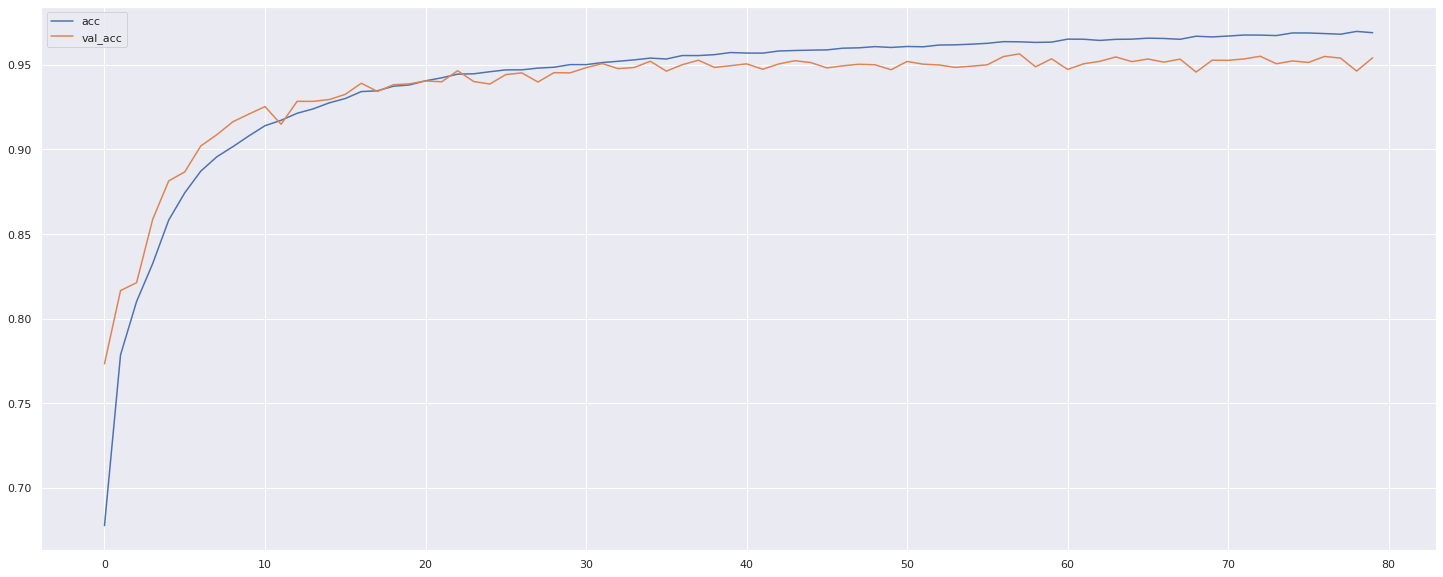

In [30]:
fig = plt.gcf()
fig.set_size_inches(25, 10)
plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label='val_acc')
plt.legend()
plt.savefig('./custom_acc.png')

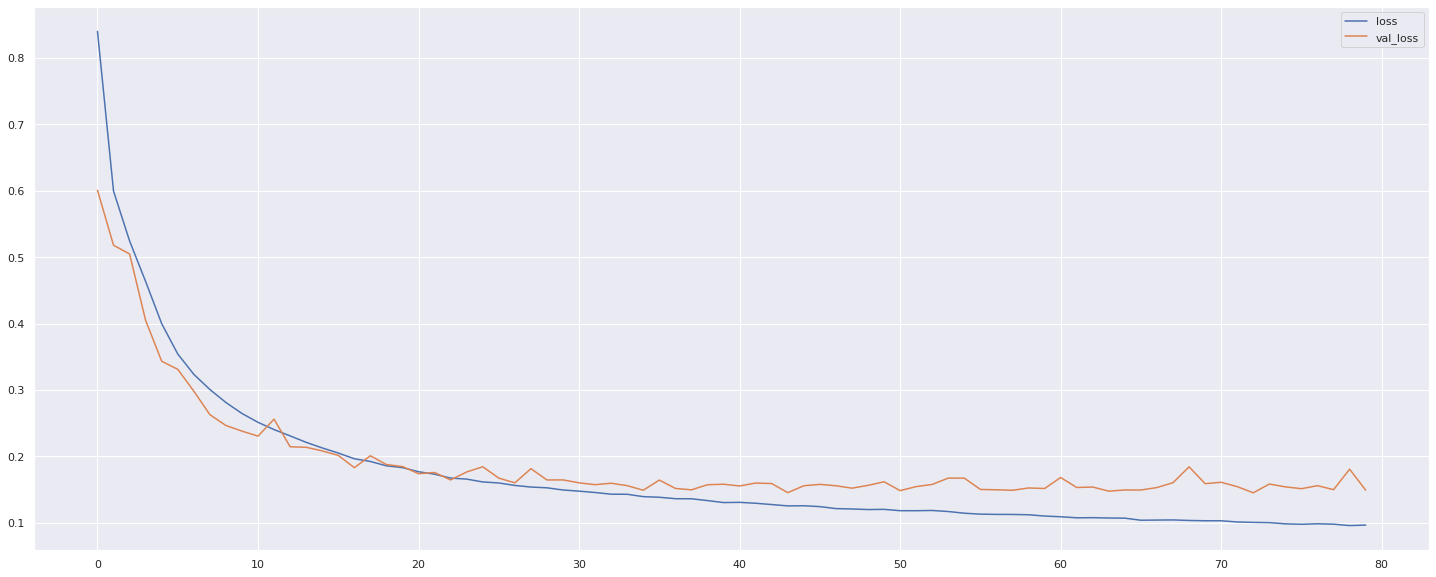

In [31]:
fig = plt.gcf()
fig.set_size_inches(25, 10)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.savefig('./custom_loss.png')

In [32]:
valid_generator.classes 
y_pred = adam1_model.predict(valid_generator)       


In [34]:
y_pred_bool = np.argmax(y_pred, axis=1)
y_test = valid_generator.classes
print(y_pred_bool[:10])
print(y_test[:10])

[0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0]


In [35]:
cm1= confusion_matrix(y_test, y_pred_bool)

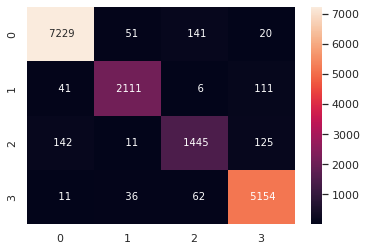

In [36]:
import seaborn as sns
hm1 = sns.heatmap(cm1, annot=True, fmt='5d')
hm1.figure.savefig('custom_last_heatmap.png')

In [37]:
accuracy_score(y_test, y_pred_bool)

0.9546597987541926

In [38]:
print(classification_report(y_test, np.squeeze(y_pred_bool), target_names=list(valid_generator.class_indices.keys())))

              precision    recall  f1-score   support

         CNV       0.97      0.97      0.97      7441
         DME       0.96      0.93      0.94      2269
      DRUSEN       0.87      0.84      0.86      1723
      NORMAL       0.95      0.98      0.97      5263

    accuracy                           0.95     16696
   macro avg       0.94      0.93      0.93     16696
weighted avg       0.95      0.95      0.95     16696



Test the "best" weights

In [39]:
adam1_model.load_weights(best_path_adam)


In [40]:
y_pred = adam1_model.predict(valid_generator) 

In [41]:


y_pred_bool = np.argmax(y_pred, axis=1)
y_test = valid_generator.classes
print(y_pred_bool[:10])

[0 0 0 0 0 0 0 0 0 0]


In [42]:
#print(classification_report(y_test, y_pred_bool))
cm2 = confusion_matrix(y_test, y_pred_bool)

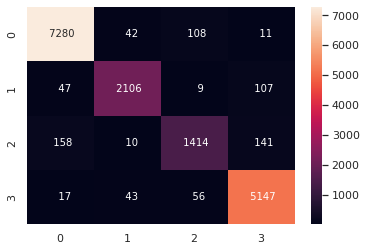

In [46]:
hm2 = sns.heatmap(cm2, annot=True, fmt='5d')
hm2.figure.savefig('custom_best_heatmap.png')

In [44]:
accuracy_score(y_test, y_pred_bool)

0.9551389554384284

In [45]:
print(classification_report(y_test, np.squeeze(y_pred_bool), target_names=list(valid_generator.class_indices.keys())))

              precision    recall  f1-score   support

         CNV       0.97      0.98      0.97      7441
         DME       0.96      0.93      0.94      2269
      DRUSEN       0.89      0.82      0.85      1723
      NORMAL       0.95      0.98      0.96      5263

    accuracy                           0.96     16696
   macro avg       0.94      0.93      0.93     16696
weighted avg       0.95      0.96      0.95     16696



In [47]:
tf.saved_model.save(adam1_model, './custom_best')

INFO:tensorflow:Assets written to: ./custom_best/assets


In [49]:
loaded = tf.saved_model.load('./custom_best') 
converter = tf.lite.TFLiteConverter.from_saved_model("./custom_best")
tflite_best_custom = "./tflite_custom_best"
with open(tflite_best_custom, "wb") as f:
          f.write(converter.convert())

                                                     

In [50]:
with open(tflite_best_custom, 'rb') as f:
    tflite_best_custom_instance = f.read()
    

In [52]:
interpreter_custom_best = tf.lite.Interpreter(model_content=tflite_best_custom_instance)
interpreter_custom_best.allocate_tensors()
input_index = interpreter_custom_best.get_input_details()[0]['index']
output_index = interpreter_custom_best.get_output_details()[0]['index']